<a href="https://colab.research.google.com/github/gibranhasan14/Side-Projects/blob/master/NPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

data = pd.read_excel('study_schedule_vs_NPS.xlsx')

In [0]:
tried_study = data.loc[data["study_sch"] == 1, "referral_score"]
not_tried_study = data.loc[data["study_sch"] == 0, "referral_score"]


def NPS_unit(rscore):
    if rscore > 8 :
        return 'H'
    elif rscore < 7:
        return 'L'
    return 'M'

def computeCells(series):
    NPS_series = series.apply(NPS_unit)
    high = (NPS_series == 'H').sum()
    medium = (NPS_series == 'M').sum()
    low = (NPS_series == 'L').sum()
    return high, medium, low

In [0]:
computeCells(tried_study)

(491, 36, 44)

In [0]:
computeCells(not_tried_study)

(15, 198, 215)

In [0]:
Observed NPS is 491/571 - 44/571 == 78.3%

In [0]:
#Results are:
#    Tried         Not-Tried
#H    491             15
#M    36              198
#L    44              215
#     571             428
## Observed NPS is 491/571 - 44/571 == 78.3%    
#And the question is what is the probability/confidence that Theta0,0 - Theta2,0 - (Theta0,1 - Theta2,1) >=5?
#Probably the "best" answer is 100%; my guess is that this is a trick question,
#sort of testing whether you can see the forest for the trees,
#pj = 491/571
#an approximate CI around Theta0,0 ==> pj +/- Z * sqrt(pj * (1 - pj) / 571)   
#if you choose Z to be 4 (which is CL of .9996), you get .802 as lower bound



In [0]:
data.head()

,user_id,referral_score,study_sch,note_taking
0,10069,10,1,1
1,10088,8,0,0
2,10138,10,1,1
3,10264,10,1,1
4,10277,10,1,1


# 2.4 Solution

In [0]:
(data['study_sch'] == data['note_taking']).mean()

0.98398398398398401

In [0]:
(data['note_taking'] == data['note_taking']).mean()

1.0

In [0]:
data['study_score'] = data.iloc[:,2]*data.iloc[:,1]
data['note_score'] = data.iloc[:,3]*data.iloc[:,1]
data[['study_score', 'note_score']].mean()

study_score    5.257257
note_score     5.224224
dtype: float64

In [0]:
study_sch_tried=data.query("study_sch==1")['referral_score'].mean()
study_sch_tried

9.197898423817863

In [0]:
note_taking_tried=data.query("note_taking==1")['referral_score'].mean()
note_taking_tried

9.140105078809107

In [0]:
study_sch_nottried=data.query("study_sch==0")['referral_score'].mean()
study_sch_nottried

5.880841121495327

In [0]:
note_taking_nottried=data.query("note_taking==0")['referral_score'].mean()
note_taking_nottried

5.957943925233645

In [0]:
(study_sch_tried - study_sch_nottried) / (study_sch_nottried) * 100

56.40447061557591

In [0]:
(note_taking_tried - note_taking_nottried) / (note_taking_nottried) * 100

53.41039112667835

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
user_id           999 non-null int64
referral_score    999 non-null int64
study_sch         999 non-null int64
note_taking       999 non-null int64
dtypes: int64(4)
memory usage: 31.3 KB


In [0]:
didnt_try = data.query("study_sch==0")['referral_score']

In [0]:
tried=data.query("study_sch==1")['referral_score']
tried

0      10
2      10
3      10
4      10
6      10
13      9
15     10
16     10
17     10
18     10
19     10
21     10
22     10
23     10
25     10
31     10
35     10
37      9
38     10
40     10
41     10
43     10
45     10
46     10
47     10
48     10
51     10
52     10
53      9
54     10
       ..
950    10
951    10
952     9
953     9
957    10
958    10
960    10
963     9
964     9
966     9
968    10
970    10
971     9
972    10
974    10
975     9
976    10
977    10
979     4
982    10
983     9
984    10
985    10
986     9
987    10
988    10
989    10
993    10
994    10
997    10
Name: referral_score, Length: 571, dtype: int64

In [0]:
test = [i for i in tried if i >8]

In [0]:
test

[10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 9,
 9,
 9,
 10,
 10,
 9,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 9,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 9,
 10,
 10,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 9,
 9,
 9,
 10,
 10,
 9,
 10,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 9,
 10,
 9,
 10,
 10,
 9,
 9,
 10,
 9,
 9,
 10,
 10,
 9,
 10,
 10,
 9,
 9,
 10,
 9,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 9,
 10,
 9,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 10

In [0]:
nps = lambda x: float(((len([i for i in x if i > 8]) / len(x)) * 100) - ((len([i for i in x if i < 7]) / len(x)) * 100))

In [0]:
nps(tried)

78.28371278458845

In [0]:
nps(didnt_try)

-46.728971962616825

In [0]:
tried.apply(lambda x : 1 if x > 8 else 0)

0      1
2      1
3      1
4      1
6      1
13     1
15     1
16     1
17     1
18     1
19     1
21     1
22     1
23     1
25     1
31     1
35     1
37     1
38     1
40     1
41     1
43     1
45     1
46     1
47     1
48     1
51     1
52     1
53     1
54     1
      ..
950    1
951    1
952    1
953    1
957    1
958    1
960    1
963    1
964    1
966    1
968    1
970    1
971    1
972    1
974    1
975    1
976    1
977    1
979    0
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
993    1
994    1
997    1
Name: referral_score, Length: 571, dtype: int64

In [0]:
type(tried)

pandas.core.series.Series

In [0]:
data.count()

user_id           999
referral_score    999
study_sch         999
note_taking       999
dtype: int64

In [0]:
data.iloc[:,:3]

,user_id,referral_score,study_sch
0,10069,10,1
1,10088,8,0
2,10138,10,1
3,10264,10,1
4,10277,10,1
5,10315,4,0
6,10355,10,1
7,10366,6,0
8,10432,6,0
9,10507,4,0


In [0]:
df = data.drop(['user_id', 'note_taking'], axis=1)
df= df.dropna()

In [0]:
df

,referral_score,study_sch
0,10,1
1,8,0
2,10,1
3,10,1
4,10,1
5,4,0
6,10,1
7,6,0
8,6,0
9,4,0


In [0]:
df2 = data.drop(['user_id'], axis=1)
df2

,referral_score,study_sch,note_taking
0,10,1,1
1,8,0,0
2,10,1,1
3,10,1,1
4,10,1,1
5,4,0,0
6,10,1,0
7,6,0,0
8,6,0,0
9,4,0,0


In [0]:
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm
formula = 'study_sch ~ C(referral_score)'

In [0]:
df_train = df.iloc[ 0: 666, : ]
df_test = df.iloc[ 666: , : ]

In [0]:
y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

In [0]:
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()

         Current function value: 0.313991
         Iterations: 35


/Users/gibranhasan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              study_sch   No. Observations:                  666
Model:                          Logit   Df Residuals:                      655
Method:                           MLE   Df Model:                           10
Date:                Sat, 17 Mar 2018   Pseudo R-squ.:                  0.5385
Time:                        22:13:41   Log-Likelihood:                -209.12
converged:                      False   LL-Null:                       -453.16
                                        LLR p-value:                 1.544e-98
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.2993      0.651     -1.995      0.046      -2.576      -0.023
C(referral_score)[T.1]    -18.1048   8175.595     -0.002      0.998    -1.6e+04     1.6e+04
C(referral_score)[T.2]      0.2007      0.870      0.231      0.818      -1.505       1.907
C(referral_score)[T.3]      0.0755      0.826      0.091      0.927      -1.544       1.695
C(referral_score)[T.4]     -0.1671      0.793     -0.211      0.833      -1.722       1.388
C(referral_score)[T.5]     -0.3494      0.814     -0.429      0.668      -1.945       1.246
C(referral_score)[T.6]      0.0336      0.735      0.046      0.964      -1.408       1.475
C(referral_score)[T.7]     -0.2958      0.714     -0.414      0.679      -1.696       1.104
C(referral_score)[T.8]     -0.1515      0.712     -0.213      0.831      -1.546       1.243
C(referral_score)[T.9]      3.7560      0.778      4.828      0.000       2.231       5.281
C(referral_score)[T.10]     5.0409      0.771      6.536      0.000       3.529       6.553
===========================================================================================
"""

In [0]:
from statsmodels.distributions.mixture_rvs import mixture_rvs
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kde import KDEUnivariate
from scipy import stats


In [0]:
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=1.0)
plt.title("Distribution of our Predictions")

Text(0.5,1,'Distribution of our Predictions')

In [0]:
plt.scatter(res.predict(),x_train['C(referral_score)[T.8]'] , alpha=1.0)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

Text(0.5,1,'The Change of Survival Probability by Gender being Male')

In [0]:
from sklearn.metrics import classification_report

In [0]:
y_pred = res.predict(x_test)
y_pred_flag = y_pred > 0.7
print(pd.crosstab(y_test.study_sch
                      ,y_pred_flag
                     ,rownames = ['Actual']
                     ,colnames = ['Predicted']))
print('\n \n')

print(classification_report(y_test,y_pred_flag))

Predicted  False  True 
Actual                 
0.0          145      3
1.0           17    168

 

             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94       148
        1.0       0.98      0.91      0.94       185

avg / total       0.94      0.94      0.94       333



In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [0]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)


Area under the ROC curve : 0.956300


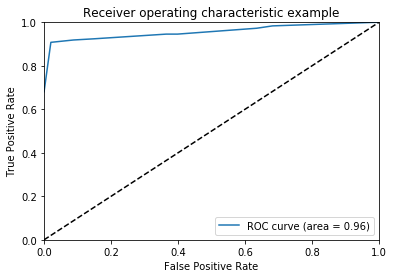

In [0]:
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
import numpy as np

In [0]:
model = LogisticRegression()
model = model.fit(x_train, y_train.study_sch)

In [0]:
pd.DataFrame(list(zip(x_train.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[-0.330840385474]
1,C(referral_score)[T.1],[-0.771034094605]
2,C(referral_score)[T.2],[-0.329795893471]
3,C(referral_score)[T.3],[-0.44925708452]
4,C(referral_score)[T.4],[-0.67226467576]
5,C(referral_score)[T.5],[-0.806040694081]
6,C(referral_score)[T.6],[-0.541932313409]
7,C(referral_score)[T.7],[-0.86113601538]
8,C(referral_score)[T.8],[-0.730140829859]
9,C(referral_score)[T.9],[2.70662572127]


In [0]:
y_pred = model.predict_proba(x_test)
y_pred_flag = y_pred[:,1] > 0.7

print(pd.crosstab(y_test.study_sch
                     ,y_pred_flag
                     ,rownames = ['Actual']
                     ,colnames = ['Predicted']))

print('\n \n')

print(classification_report(y_test,y_pred_flag))

Predicted  False  True 
Actual                 
0.0          145      3
1.0           17    168

 

             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94       148
        1.0       0.98      0.91      0.94       185

avg / total       0.94      0.94      0.94       333



In [0]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


Area under the ROC curve : 0.956081


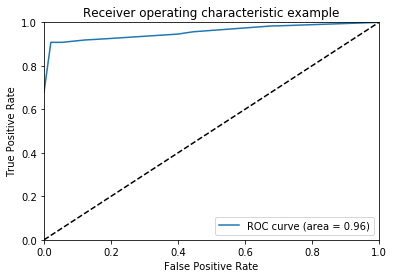

In [0]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()